To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
  <a href="https://github.com/unslothai/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/u54VK8m8tk"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
  <a href="https://ko-fi.com/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Kofi button.png" width="145"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your own computer, follow the installation instructions on our Github page [here](https://github.com/unslothai/unsloth#installation-instructions---conda).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save) (eg for Llama.cpp).

[NEW] Gemma 2 comes in 3 sizes: 2b, 9b and 27b. 2b uses 2 trillion tokens distilled from 27b!

**[NEW] Try 2x faster inference in a free Colab for Gemma-2 2b Instruct [here](https://colab.research.google.com/drive/1i-8ESvtLRGNkkUQQr_-z_rcSAIo9c3lM?usp=sharing)**

In [1]:
%%capture
!pip install unsloth
# Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

# Install Flash Attention 2 for softcapping support
import torch
if torch.cuda.get_device_capability()[0] >= 8:
    !pip install --no-deps packaging ninja einops "flash-attn>=2.6.3"

* We support Llama, Mistral, Phi-3, Gemma, Yi, DeepSeek, Qwen, TinyLlama, Vicuna, Open Hermes etc
* We support 16bit LoRA or 4bit QLoRA. Both 2x faster.
* `max_seq_length` can be set to anything, since we do automatic RoPE Scaling via [kaiokendev's](https://kaiokendev.github.io/til) method.
* [**NEW**] We make Gemma-2 9b / 27b **2x faster**! See our [Gemma-2 9b notebook](https://colab.research.google.com/drive/1vIrqH5uYDQwsJ4-OO3DErvuv4pBgVwk4?usp=sharing)
* [**NEW**] To finetune and auto export to Ollama, try our [Ollama notebook](https://colab.research.google.com/drive/1WZDi7APtQ9VsvOrQSSC5DDtxq159j8iZ?usp=sharing)
* [**NEW**] We make Mistral NeMo 12B 2x faster and fit in under 12GB of VRAM! [Mistral NeMo notebook](https://colab.research.google.com/drive/17d3U-CAIwzmbDRqbZ9NnpHxCkmXB6LZ0?usp=sharing)

In [16]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = False # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 15 trillion tokens model 2x faster!
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # We also uploaded 4bit for 405b!
    "unsloth/Mistral-Nemo-Base-2407-bnb-4bit", # New Mistral 12b 2x faster!
    "unsloth/Mistral-Nemo-Instruct-2407-bnb-4bit",
    "unsloth/mistral-7b-v0.3-bnb-4bit",        # Mistral v3 2x faster!
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/Phi-3-mini-4k-instruct",          # Phi-3 2x faster!d
    "unsloth/Phi-3-medium-4k-instruct",
    "unsloth/gemma-2-9b-bnb-4bit",
    "unsloth/gemma-2-27b-bnb-4bit",            # Gemma 2x faster!
    "unsloth/gemma-2-2b-bnb-4bit",             # New small Gemma model!
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Qwen2.5-0.5B-Instruct",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

==((====))==  Unsloth 2024.9.post3: Fast Qwen2 patching. Transformers = 4.45.1.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1+cu121. CUDA = 7.5. CUDA Toolkit = 12.1.
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/632 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

We now add LoRA adapters so we only need to update 1 to 10% of all parameters!

In [17]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

Unsloth 2024.9.post3 patched 24 layers with 0 QKV layers, 24 O layers and 24 MLP layers.


<a name="Data"></a>
### Data Prep
We now use the Alpaca dataset from [yahma](https://huggingface.co/datasets/yahma/alpaca-cleaned), which is a filtered version of 52K of the original [Alpaca dataset](https://crfm.stanford.edu/2023/03/13/alpaca.html). You can replace this code section with your own data prep.

**[NOTE]** To train only on completions (ignoring the user's input) read TRL's docs [here](https://huggingface.co/docs/trl/sft_trainer#train-on-completions-only).

**[NOTE]** Remember to add the **EOS_TOKEN** to the tokenized output!! Otherwise you'll get infinite generations!

If you want to use the `llama-3` template for ShareGPT datasets, try our conversational [notebook](https://colab.research.google.com/drive/1XamvWYinY6FOSX9GLvnqSjjsNflxdhNc?usp=sharing).

For text completions like novel writing, try this [notebook](https://colab.research.google.com/drive/1ef-tab5bhkvWmBOObepl1WgJvfvSzn5Q?usp=sharing).

In [18]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    instructions = examples["prompt"]
    inputs       = examples["query"]
    outputs      = examples["response"]
    texts = []
    for instruction, input, output in zip(instructions, inputs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = alpaca_prompt.format(instruction, input, output) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }
pass

# from datasets import load_dataset
# dataset = load_dataset("yahma/alpaca-cleaned", split = "train")
# dataset = dataset.map(formatting_prompts_func, batched = True,)

In [19]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("/content", data_files="restructured_dataset.json")

# Split the dataset into 80% training and 20% test
split_ratio = 0.8
train_test_split = dataset["train"].train_test_split(test_size=1 - split_ratio, seed=42)  # Set seed for reproducibility

# Get the train and test datasets
train_dataset = train_test_split["train"]
test_dataset = train_test_split["test"]

# Output the sizes to verify
print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")


Training dataset size: 2256
Test dataset size: 565


In [20]:
train_dataset = train_dataset.map(formatting_prompts_func, batched = True,)
test_dataset = test_dataset.map(formatting_prompts_func, batched = True,)

Map:   0%|          | 0/2256 [00:00<?, ? examples/s]

Map:   0%|          | 0/565 [00:00<?, ? examples/s]

In [21]:
train_dataset['text']

["Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\ngiven the following conversation between user and unknown, determine whether unknown is a potential scammer or not. respond with 1 if the unknown's conversation contains indicators of a scam, otherwise respond with 0. answer in terms of 0 and 1 only. dont include any other kind of explanation or text in the response.\n\n### Input:\nunknown: it's never too late to learn! i started when i was in high school \nuser: i know, i just don't have the time. i'm a single mom and i work full time. \nunknown: i understand that. i'm also a single parent, but i'm lucky enough to have a great support system \nuser: that's great! i'm happy to hear that. \nunknown: thanks! \nuser: so, what's your favorite thing to do with your kids? \nunknown: i love to take them to the park and play soccer with them. they're both really goo

<a name="Train"></a>
### Train the model
Now let's use Huggingface TRL's `SFTTrainer`! More docs here: [TRL SFT docs](https://huggingface.co/docs/trl/sft_trainer). We do 60 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`. We also support TRL's `DPOTrainer`!

In [34]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = train_dataset,
    eval_dataset=test_dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = True, # Can make training 5x faster for short sequences.
    args = TrainingArguments(
        per_device_train_batch_size = 1,
        per_device_eval_batch_size = 1,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        num_train_epochs = 3, # Set this for 1 full training run.
        # max_steps = 60,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        evaluation_strategy="steps"
    ),
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [35]:
#@title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.748 GB.
14.492 GB of memory reserved.


In [36]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 278 | Num Epochs = 3
O^O/ \_/ \    Batch size per device = 1 | Gradient Accumulation steps = 4
\        /    Total batch size = 4 | Total steps = 207
 "-____-"     Number of trainable parameters = 8,798,208


In [37]:
#@title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

3026.5783 seconds used for training.
50.44 minutes used for training.
Peak reserved memory = 14.492 GB.
Peak reserved memory for training = 0.0 GB.
Peak reserved memory % of max memory = 98.264 %.
Peak reserved memory for training % of max memory = 0.0 %.


Training Losses: [1.3513, 1.353, 1.2913, 1.4104, 1.1998, 1.2438, 1.233, 0.9942, 1.1278, 1.1632, 1.1146, 1.0169, 0.8647, 1.035, 1.0038, 0.9957, 1.0753, 0.8855, 0.9558, 0.8502, 0.8322, 0.8112, 0.9149, 0.8929, 0.8171, 0.8453, 0.8778, 0.8081, 0.8629, 0.8299, 0.8979, 0.6792, 0.7574, 0.6362, 0.8004, 0.7276, 0.6297, 0.7539, 0.6196, 0.576, 0.6177, 0.6696, 0.6853, 0.6534, 0.5616, 0.4806, 0.5526, 0.496, 0.5157, 0.5616, 0.5073, 0.5117, 0.4957, 0.5392, 0.4817, 0.5238, 0.4637, 0.4023, 0.4042, 0.4262, 0.429, 0.4329, 0.3988, 0.4161, 0.4054, 0.4796, 0.4369, 0.4035, 0.348, 0.3813, 0.3258, 0.3402, 0.3627, 0.2755, 0.2885, 0.2909, 0.2453, 0.2856, 0.2658, 0.2675, 0.2409, 0.2463, 0.2361, 0.2696, 0.222, 0.255, 0.2255, 0.221, 0.2069, 0.2152, 0.2154, 0.2073, 0.1807, 0.2024, 0.1903, 0.1847, 0.171, 0.2047, 0.1613, 0.1302, 0.1295, 0.1608, 0.154, 0.1383, 0.1787, 0.165, 0.1711, 0.1692, 0.1337, 0.1654, 0.1421, 0.1559, 0.1224, 0.1176, 0.1335, 0.1439, 0.1449, 0.1255, 0.097, 0.1044, 0.1083, 0.1191, 0.1361, 0.1223, 0.10

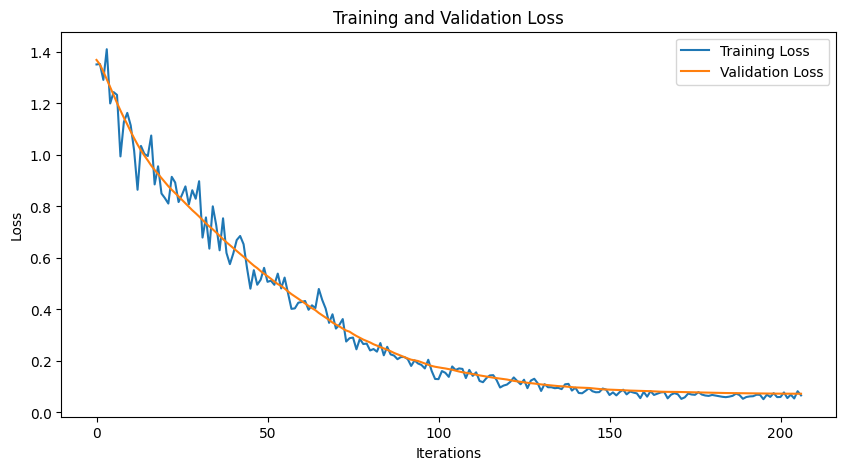

In [38]:
# trainer.state.log_history
train_losses = [log["loss"] for log in trainer.state.log_history if "loss" in log]
eval_losses = [log["eval_loss"] for log in trainer.state.log_history if "eval_loss" in log]

# Print out the losses to verify
print(f"Training Losses: {train_losses}")
print(f"Evaluation Losses: {eval_losses}")

# Plot the losses using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(eval_losses, label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

<a name="Inference"></a>
### Inference
Let's run the model! You can change the instruction and input - leave the output blank!

**[NEW] Try 2x faster inference in a free Colab for Llama-3.1 8b Instruct [here](https://colab.research.google.com/drive/1T-YBVfnphoVc8E2E854qF3jdia2Ll2W2?usp=sharing)**

In [ ]:
# alpaca_prompt = Copied from above
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[
    alpaca_prompt.format(
        "given the following conversation between user and unknown, determine whether unknown is a potential scammer or not. respond with 1 if the unknown's conversation contains indicators of a scam, otherwise respond with 0. answer in terms of 0 and 1 only. dont include any other kind of explanation or text in the response.", # instruction
        "unknown: hello sir, i am nameslot from nameslot agency we are providing personal loans at an interest rate of 5 percent per annum it's a limited-time offer, and we can send a representative to help you fill out the application form \nuser: 5 percent only! that sounds really good i need the loan urgently \nunknown: yes, sir, it’s a very attractive offer we can get everything sorted for you quickly just share your basic details like your name, address, and bank account information, and we’ll take care of the rest \nuser: oh, okay what other details do you need? \nunknown: just your id proof and a small processing fee of ₹2,000 to get things started once you pay that, our representative will come to your location to complete the paperwork \nuser: ₹2,000? but usually, fees are deducted from the loan amount, right? \nunknown: yes, normally, but because this is a special low-interest offer, we need to collect the processing fee upfront to ensure your loan gets priority it’s a one-time payment, and you’ll have the loan within 24 hours \nuser: hmm, i’m not sure can i check some details first? \nunknown: sir, if you wait too long, this offer might expire nameslot, another client, just secured his loan with us at the same rate he paid the fee immediately, and now he’s enjoying his funds without any delays don’t miss out! \nuser: alright, i’ll think about it and get back to you", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)
tokenizer.batch_decode(outputs)

["Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\ngiven the following conversation between user and unknown, determine whether unknown is a potential scammer or not. respond with 1 if the unknown's conversation contains indicators of a scam, otherwise respond with 0. answer in terms of 0 and 1 only. dont include any other kind of explanation or text in the response.\n\n### Input:\nunknown: hello sir, i am nameslot from nameslot agency we are providing personal loans at an interest rate of 5 percent per annum it's a limited-time offer, and we can send a representative to help you fill out the application form \nuser: 5 percent only! that sounds really good i need the loan urgently \nunknown: yes, sir, it’s a very attractive offer we can get everything sorted for you quickly just share your basic details like your name, address, and bank account information, 

 You can also use a `TextStreamer` for continuous inference - so you can see the generation token by token, instead of waiting the whole time!

In [ ]:
# alpaca_prompt = Copied from above
# FastLanguageModel.for_inference(model) # Enable native 2x faster inference
# inputs = tokenizer(
# [
#     alpaca_prompt.format(
#         "Continue the fibonnaci sequence.", # instruction
#         "1, 1, 2, 3, 5, 8", # input
#         "", # output - leave this blank for generation!
#     )
# ], return_tensors = "pt").to("cuda")

# from transformers import TextStreamer
# text_streamer = TextStreamer(tokenizer)
# _ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128)

<a name="Save"></a>
### Saving, loading finetuned models
To save the final model as LoRA adapters, either use Huggingface's `push_to_hub` for an online save or `save_pretrained` for a local save.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [ ]:
model.save_pretrained("lora_model") # Local saving
tokenizer.save_pretrained("lora_model")
model.push_to_hub("AiisNothing/Qwen2.5-0.5b-unsloth", token = "") # Online saving
tokenizer.push_to_hub("AiisNothing/Qwen2.5-0.5b-unsloth", token = "") # Online saving

README.md:   0%|          | 0.00/582 [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/35.2M [00:00<?, ?B/s]

Saved model to https://huggingface.co/AiisNothing/Qwen2.5-0.5b-unsloth


  0%|          | 0/1 [00:00<?, ?it/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

Now if you want to load the LoRA adapters we just saved for inference, set `False` to `True`:

In [ ]:
# if False:
#     from unsloth import FastLanguageModel
#     model, tokenizer = FastLanguageModel.from_pretrained(
#         model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
#         max_seq_length = max_seq_length,
#         dtype = dtype,
#         load_in_4bit = load_in_4bit,
#     )
#     FastLanguageModel.for_inference(model) # Enable native 2x faster inference

# # alpaca_prompt = You MUST copy from above!

# inputs = tokenizer(
# [
#     alpaca_prompt.format(
#         "What is a famous tall tower in Paris?", # instruction
#         "", # input
#         "", # output - leave this blank for generation!
#     )
# ], return_tensors = "pt").to("cuda")

# from transformers import TextStreamer
# text_streamer = TextStreamer(tokenizer)
# _ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128)

You can also use Hugging Face's `AutoModelForPeftCausalLM`. Only use this if you do not have `unsloth` installed. It can be hopelessly slow, since `4bit` model downloading is not supported, and Unsloth's **inference is 2x faster**.

In [ ]:
if False:
    # I highly do NOT suggest - use Unsloth if possible
    from peft import AutoPeftModelForCausalLM
    from transformers import AutoTokenizer
    model = AutoPeftModelForCausalLM.from_pretrained(
        "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        load_in_4bit = load_in_4bit,
    )
    tokenizer = AutoTokenizer.from_pretrained("lora_model")

### Saving to float16 for VLLM

We also support saving to `float16` directly. Select `merged_16bit` for float16 or `merged_4bit` for int4. We also allow `lora` adapters as a fallback. Use `push_to_hub_merged` to upload to your Hugging Face account! You can go to https://huggingface.co/settings/tokens for your personal tokens.

In [ ]:
# Merge to 16bit
if False: model.save_pretrained_merged("model", tokenizer, save_method = "merged_16bit",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "merged_16bit", token = "")

# Merge to 4bit
if False: model.save_pretrained_merged("model", tokenizer, save_method = "merged_4bit",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "merged_4bit", token = "hf_token")

# Just LoRA adapters
if False: model.save_pretrained_merged("model", tokenizer, save_method = "lora",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "lora", token = "")

### GGUF / llama.cpp Conversion
To save to `GGUF` / `llama.cpp`, we support it natively now! We clone `llama.cpp` and we default save it to `q8_0`. We allow all methods like `q4_k_m`. Use `save_pretrained_gguf` for local saving and `push_to_hub_gguf` for uploading to HF.

Some supported quant methods (full list on our [Wiki page](https://github.com/unslothai/unsloth/wiki#gguf-quantization-options)):
* `q8_0` - Fast conversion. High resource use, but generally acceptable.
* `q4_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q4_K.
* `q5_k_m` - Recommended. Uses Q6_K for half of the attention.wv and feed_forward.w2 tensors, else Q5_K.

[**NEW**] To finetune and auto export to Ollama, try our [Ollama notebook](https://colab.research.google.com/drive/1WZDi7APtQ9VsvOrQSSC5DDtxq159j8iZ?usp=sharing)

In [ ]:
# Save to 8bit Q8_0
if False: model.save_pretrained_gguf("model", tokenizer,)
# Remember to go to https://huggingface.co/settings/tokens for a token!
# And change hf to your username!
if False: model.push_to_hub_gguf("hf/model", tokenizer, token = "")

# Save to 16bit GGUF
if False: model.save_pretrained_gguf("model", tokenizer, quantization_method = "f16")
if False: model.push_to_hub_gguf("hf/model", tokenizer, quantization_method = "f16", token = "")

# Save to q4_k_m GGUF
if True: model.save_pretrained_gguf("model", tokenizer, quantization_method = "q8_0")
if True: model.push_to_hub_gguf("AiisNothing/Qwen2.5-0.5b-unsloth_q8_k", tokenizer, quantization_method = "q8_0", token = "")
# Save to multiple GGUF options - much faster if you want multiple!
if False:
    model.push_to_hub_gguf(
        "hf/model", # Change hf to your username!
        tokenizer,
        quantization_method = ["q4_k_m", "q8_0", "q5_ek_m",],
        token = "", # Get a token at https://huggingface.co/settings/tokens
    )

Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 5.99 out of 12.67 RAM for saving.


100%|██████████| 24/24 [00:00<00:00, 99.52it/s] 


Unsloth: Saving tokenizer... Done.
Unsloth: Saving model... This might take 5 minutes for Llama-7b...
Unsloth: Saving model/pytorch_model.bin...
Done.
==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp will take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits will take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['q8_0'] will take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: [0] Installing llama.cpp. This will take 3 minutes...
Unsloth: [1] Converting model at model into q8_0 GGUF format.
The output location will be ./model/unsloth.Q8_0.gguf
This will take 3 minutes...
INFO:hf-to-gguf:Loading model: model
INFO:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
INFO:hf-to-gguf:Exporting model...
INFO:hf-to-gguf:gguf: loading model part 'pytorch_model.bin'
INFO:hf-to-gguf:token_embd.weight,         torch.float16 --> Q8_0, shape = {896, 151936}
INFO:hf-to

100%|██████████| 24/24 [00:00<00:00, 98.99it/s] 


Unsloth: Saving tokenizer... Done.
Unsloth: Saving model... This might take 5 minutes for Llama-7b...
Unsloth: Saving AiisNothing/Qwen2.5-0.5b-unsloth_q8_k/pytorch_model.bin...
Done.
==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp will take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits will take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['q8_0'] will take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: [0] Installing llama.cpp. This will take 3 minutes...
Unsloth: [1] Converting model at AiisNothing/Qwen2.5-0.5b-unsloth_q8_k into q8_0 GGUF format.
The output location will be ./AiisNothing/Qwen2.5-0.5b-unsloth_q8_k/unsloth.Q8_0.gguf
This will take 3 minutes...
INFO:hf-to-gguf:Loading model: Qwen2.5-0.5b-unsloth_q8_k
INFO:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
INFO:hf-to-gguf:Exporting model...
INFO:hf-to-gguf:gguf: loading model part 'py

  0%|          | 0/1 [00:00<?, ?it/s]

unsloth.Q8_0.gguf:   0%|          | 0.00/531M [00:00<?, ?B/s]

Saved GGUF to https://huggingface.co/AiisNothing/Qwen2.5-0.5b-unsloth_q8_k


Now, use the `model-unsloth.gguf` file or `model-unsloth-Q4_K_M.gguf` file in `llama.cpp` or a UI based system like `GPT4All`. You can install GPT4All by going [here](https://gpt4all.io/index.html).

**[NEW] Try 2x faster inference in a free Colab for Llama-3.1 8b Instruct [here](https://colab.research.google.com/drive/1T-YBVfnphoVc8E2E854qF3jdia2Ll2W2?usp=sharing)**

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/u54VK8m8tk) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other links:
1. Zephyr DPO 2x faster [free Colab](https://colab.research.google.com/drive/15vttTpzzVXv_tJwEk-hIcQ0S9FcEWvwP?usp=sharing)
2. Llama 7b 2x faster [free Colab](https://colab.research.google.com/drive/1lBzz5KeZJKXjvivbYvmGarix9Ao6Wxe5?usp=sharing)
3. TinyLlama 4x faster full Alpaca 52K in 1 hour [free Colab](https://colab.research.google.com/drive/1AZghoNBQaMDgWJpi4RbffGM1h6raLUj9?usp=sharing)
4. CodeLlama 34b 2x faster [A100 on Colab](https://colab.research.google.com/drive/1y7A0AxE3y8gdj4AVkl2aZX47Xu3P1wJT?usp=sharing)
5. Mistral 7b [free Kaggle version](https://www.kaggle.com/code/danielhanchen/kaggle-mistral-7b-unsloth-notebook)
6. We also did a [blog](https://huggingface.co/blog/unsloth-trl) with 🤗 HuggingFace, and we're in the TRL [docs](https://huggingface.co/docs/trl/main/en/sft_trainer#accelerate-fine-tuning-2x-using-unsloth)!
7. `ChatML` for ShareGPT datasets, [conversational notebook](https://colab.research.google.com/drive/1Aau3lgPzeZKQ-98h69CCu1UJcvIBLmy2?usp=sharing)
8. Text completions like novel writing [notebook](https://colab.research.google.com/drive/1ef-tab5bhkvWmBOObepl1WgJvfvSzn5Q?usp=sharing)
9. [**NEW**] We make Phi-3 Medium / Mini **2x faster**! See our [Phi-3 Medium notebook](https://colab.research.google.com/drive/1hhdhBa1j_hsymiW9m-WzxQtgqTH_NHqi?usp=sharing)
10. [**NEW**] We make Gemma-2 9b / 27b **2x faster**! See our [Gemma-2 9b notebook](https://colab.research.google.com/drive/1vIrqH5uYDQwsJ4-OO3DErvuv4pBgVwk4?usp=sharing)
11. [**NEW**] To finetune and auto export to Ollama, try our [Ollama notebook](https://colab.research.google.com/drive/1WZDi7APtQ9VsvOrQSSC5DDtxq159j8iZ?usp=sharing)
12. [**NEW**] We make Mistral NeMo 12B 2x faster and fit in under 12GB of VRAM! [Mistral NeMo notebook](https://colab.research.google.com/drive/17d3U-CAIwzmbDRqbZ9NnpHxCkmXB6LZ0?usp=sharing)
13. [**NEW**] Llama 3.1 8b, 70b and 405b is here! We make it 2x faster and use 60% less VRAM. [Llama 3.1 8b notebook](https://colab.research.google.com/drive/1Ys44kVvmeZtnICzWz0xgpRnrIOjZAuxp?usp=sharing)

<div class="align-center">
  <a href="https://github.com/unslothai/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/u54VK8m8tk"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://ko-fi.com/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Kofi button.png" width="145"></a></a> Support our work if you can! Thanks!
</div>